## MODELING

### Roadmap:
(1) Random Forest for feature importance

(2) Clustering (optional)

(3) SVM

In [137]:
import numpy as np
import pandas as pd

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
from __future__ import division

In [140]:
import seaborn as sns

In [141]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [142]:
from sklearn.metrics import roc_auc_score

In [143]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [144]:
train = pd.read_csv("../assets/train_complete_mg.csv")

In [145]:
test = pd.read_csv("../assets/test_complete_mg.csv")

In [238]:
X = train.drop("WnvPresent", axis = 1) ##setting up df of possible explanatory variables

In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
le = LabelEncoder()

In [241]:
X["TrapCoded"] = le.fit_transform(X.Trap)

In [242]:
X.drop(["Trap", "YMD", "Sunrise", "Sunset", "Species", "NumMosquitos" ], axis = 1, inplace = True)

In [243]:
y = train.WnvPresent ##and array of dependent variable

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 19)
##splitting up original train file into train-test sections, to validate model

In [245]:
from sklearn.model_selection import StratifiedKFold

In [246]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=24) ##stratifying the cross validation

In [247]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.941231634886


In [248]:
confusion_matrix(y_test, y_pred)

array([[2982,   41],
       [ 147,   29]])

In [249]:
##Confusion Matrix: 
##True Negatives(0,0) = 2969
##False Negatives(1,0) = 152 (classified 0, actually 1)
##True Positives(1,1) = 24
##False Positives(0,1) = 54 (predicted 1, actually 0)

In [250]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      3023
          1       0.41      0.16      0.24       176

avg / total       0.92      0.94      0.93      3199



In [251]:
##Classification Report:
#Precision: when predicting, 0, how often correct? = TN / TN + FN  
    #when predicting 1, how often correct? = TP / TP + FP 
    
#Recall(1) = Sensitivity = TP / TP + FN = 
    #Recall(0) = How often does model predict no, when it is actually no?
            #TN / TN + FP
#f1-score = weighted average of precision and recall
    #f1 = 2*(precision*recall) / (precision+recall)

#support = number of observations for each class in actual data (not predictions)

In [298]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
fig1 = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

In [161]:
fig1.savefig("../Images/fig1.png")

In [162]:
s = cross_val_score(rf, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))


Random Forest Score:	0.94 ± 0.003


In [163]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.679044935795


In [262]:
X2 = X[["TrapCoded", "RESTUANS", "PIPIENS", "DaylightMinutes", "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [263]:
X2.head()

,TrapCoded,RESTUANS,PIPIENS,DaylightMinutes,DewPoint,Tmax,Week,Dist_to_Closest_Spray,Days_Since_Spray
0,1,1,1,896,59,88,22,1.5,720
1,1,1,0,896,59,88,22,1.5,720
2,6,1,0,896,58,88,22,1.5,720
3,13,1,1,896,58,88,22,1.5,720
4,13,1,0,896,58,88,22,1.5,720


In [264]:
y = train.WnvPresent

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.33, random_state = 54, stratify = y)

In [266]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.936230071897


In [267]:
confusion_matrix(y_test, y_pred)

array([[2971,   62],
       [ 142,   24]])

In [268]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      3033
          1       0.28      0.14      0.19       166

avg / total       0.92      0.94      0.93      3199



(-1, 9)

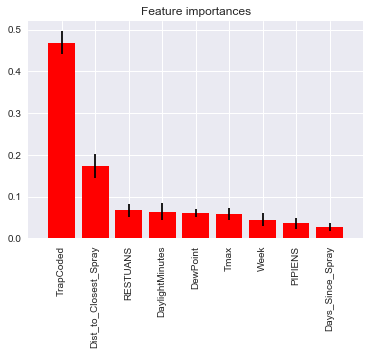

In [269]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [270]:
s = cross_val_score(rf, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))


Random Forest Score:	0.935 ± 0.001


In [271]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.71521695089


In [272]:
rf = RandomForestClassifier(n_estimators=20, max_depth = 5, n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


0.948108783995


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [273]:
confusion_matrix(y_test, y_pred)

array([[3033,    0],
       [ 166,    0]])

In [274]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.00      0.00      0.00       166

avg / total       0.90      0.95      0.92      3199



(-1, 9)

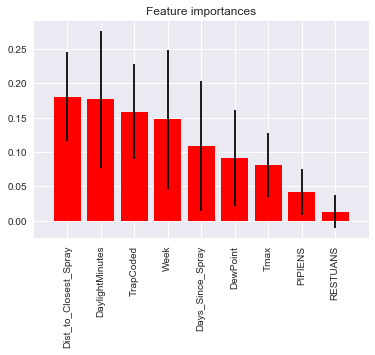

In [275]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [276]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.839393181033


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [277]:
from sklearn.model_selection import GridSearchCV

In [278]:
rf = RandomForestClassifier(class_weight = "balanced")

In [279]:
params = {
    "n_estimators": (5, 10, 20, 25, 30, 40),
    "criterion": ("gini", "entropy"),
    "max_depth": (20, 40, 60, 80)   
}

In [45]:
gridlock = GridSearchCV(rf, params, verbose = 1, cv = cv, n_jobs = -1)
gridlock.fit(X2, y)
print gridlock
print "Best score :"
print gridlock.best_score_
print gridlock.best_estimator_
print gridlock.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   12.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (5, 10, 20, 25, 30, 40), 'criterion': ('gini', 'entropy'), 'max_depth': (20, 40, 60, 80)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Best score :
0.926338594862
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=40, max_features='auto',
            max_leaf_nodes=None, min_impurity_spli

In [280]:
rf_upgrade = RandomForestClassifier(criterion = "entropy", class_weight = "balanced", max_depth = 80, n_jobs = -1, verbose = 1)

In [281]:
rf_upgrade.fit(X_train, y_train)
y_pred = rf_upgrade.predict(X_test)
print rf_upgrade.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.92528915286


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [282]:
confusion_matrix(y_test, y_pred)

array([[2930,  103],
       [ 136,   30]])

In [283]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96      3033
          1       0.23      0.18      0.20       166

avg / total       0.92      0.93      0.92      3199



(-1, 9)

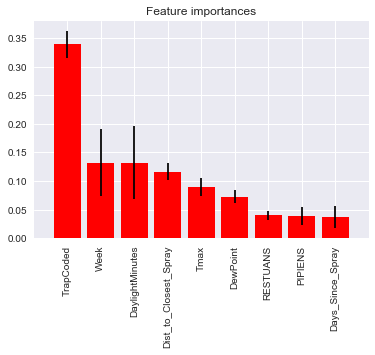

In [284]:
all(rf_upgrade.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf_upgrade.estimators_], axis=0))

importances = rf_upgrade.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf_upgrade.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [285]:
probabilities = rf_upgrade.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.706558181291


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [286]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [287]:
pipeline = Pipeline([
    ("rfpipe", RandomForestClassifier(class_weight = "balanced", n_jobs = -1, verbose = 1)),
    ("gbpipe", GradientBoostingClassifier(verbose = 1))
])

In [54]:
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


      Iter       Train Loss   Remaining Time 
         1           0.3951            0.43s
         2           0.3852            0.36s
         3           0.3778            0.33s
         4           0.3720            0.30s
         5           0.3663            0.28s
         6           0.3618            0.27s
         7           0.3579            0.26s
         8           0.3549            0.25s
         9           0.3519            0.24s
        10           0.3494            0.23s
        20           0.3338            0.18s
        30           0.3251            0.15s
        40           0.3202            0.13s
        50           0.3153            0.11s
        60           0.3111            0.09s
        70           0.3077            0.06s
        80           0.3048            0.04s
        90           0.3017            0.02s
       100           0.2981            0.00s


Pipeline(steps=[('rfpipe', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....=100, presort='auto', random_state=None,
              subsample=1.0, verbose=1, warm_start=False))])

In [55]:
y_pred = pipeline.predict(X_test)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [56]:
confusion_matrix(y_test, y_pred)

array([[3030,    3],
       [ 165,    1]])

In [57]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.25      0.01      0.01       166

avg / total       0.91      0.95      0.92      3199



In [58]:
probabilities = pipeline.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0.833511096811


In [288]:
gb = GradientBoostingClassifier()

In [289]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [290]:
y_pred = gb.predict(X_test)
print gb.score(X_test, y_test)

0.949359174742


In [291]:
s = cross_val_score(gb, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Gradient Boosting Trees Classifier", s.mean().round(3), s.std().round(3))

Gradient Boosting Trees Classifier Score:	0.946 ± 0.001


In [292]:
confusion_matrix (y_test, y_pred)

array([[3029,    4],
       [ 158,    8]])

In [293]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.67      0.05      0.09       166

avg / total       0.94      0.95      0.93      3199



In [294]:
gb.feature_importances_

array([ 0.24830064,  0.01696654,  0.03144559,  0.139496  ,  0.10061119,
        0.12101897,  0.0259755 ,  0.23134953,  0.08483604])

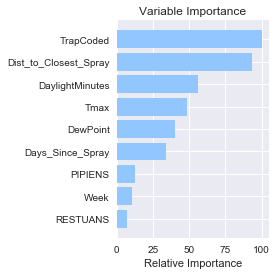

In [306]:
##VIZ taken straight from sklearn docs

feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [307]:
probabilities = gb.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.845486793862


In [308]:
params = {
    "loss": ("deviance", "exponential"),
    "n_estimators": (100, 125, 150, 175),
    "max_depth": (4, 5, 6, 7)
}

In [309]:
gb = GradientBoostingClassifier()

In [70]:
gridgrad = GridSearchCV(gb, params, verbose = 1, cv = cv, n_jobs = -1)
gridgrad.fit(X2, y)
print gridgrad
print "Best score: "
print gridgrad.best_score_
print gridgrad.best_estimator_
print gridgrad.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   43.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (100, 125, 150, 175), 'loss': ('deviance', 'exponential'), 'max_depth': (4, 5, 6, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Best score: 
0.948210048489
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_featu

In [310]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 4)

In [311]:
geebee.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [312]:
y_pred = geebee.predict(X_test)
print geebee.score(X_test, y_test)

0.949046577055


In [313]:
s = cross_val_score(geebee, X_train, y_train, cv=cv, n_jobs=1)

In [314]:
print(str(s.mean()) + " +/- " +  str(s.std()))

0.946720133993 +/- 0.000779282387158


In [315]:
confusion_matrix(y_test, y_pred)

array([[3033,    0],
       [ 163,    3]])

In [316]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       1.00      0.02      0.04       166

avg / total       0.95      0.95      0.93      3199



In [317]:
probabilities = geebee.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.833734542522


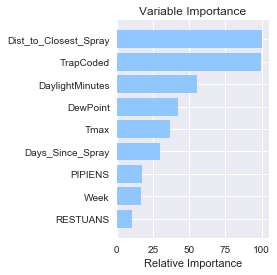

In [318]:
##VIZ taken straight from sklearn docs

feature_importance = geebee.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Moving from Model Building Just on Train Data to ... KAGGLE!!

In [319]:
test["TrapCoded"] = le.fit_transform(test.Trap)

In [320]:
targetX = test[["TrapCoded", "RESTUANS", "PIPIENS", "DaylightMinutes", 
                "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [321]:
targety = pd.read_csv("../assets/test.csv")

In [322]:
targety = targety[["Id"]]

In [323]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 5, n_estimators = 150)

In [324]:
geebee.fit(X2, y)
y_pred6 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred6:
    probability_list.append(i[1])

In [325]:
sum(probability_list)

902.04548361561035

In [326]:
targety["WnvPresent"] = probability_list

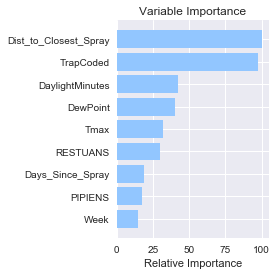

In [327]:
feature_importance = geebee.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig2 = plt.figure()
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [237]:
fig2.savefig("../Images/fig2.png")

In [96]:
#submission6 = targety.to_csv("../assets/submission6_mg.csv", index = False, encoding = "utf-8")

## Refining Sixth Submission

In [97]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 5, n_estimators = 150)

In [98]:
geebee.fit(X2, y)
y_pred6 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred6:
    probability_list.append(i[1])

In [99]:
sum(probability_list)

901.94666318818167

In [100]:
Y_pp = pd.DataFrame(geebee.predict_proba(targetX), columns=['No_WNV_pp','WNV_pp'])
print(Y_pp.iloc[0:10])

   No_WNV_pp    WNV_pp
0   0.999967  0.000033
1   0.999985  0.000015
2   0.999987  0.000013
3   0.999997  0.000003
4   0.999997  0.000003
5   0.999997  0.000003
6   0.999997  0.000003
7   0.999997  0.000003
8   0.999980  0.000020
9   0.999984  0.000016


In [101]:
Y_pp.head()

,No_WNV_pp,WNV_pp
0,0.999967,0.000033
1,0.999985,0.000015
2,0.999987,0.000013
3,0.999997,0.000003
4,0.999997,0.000003


In [210]:
from sklearn.metrics import roc_curve, auc

In [211]:
Y_score = geebee.decision_function(X2)

In [212]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()

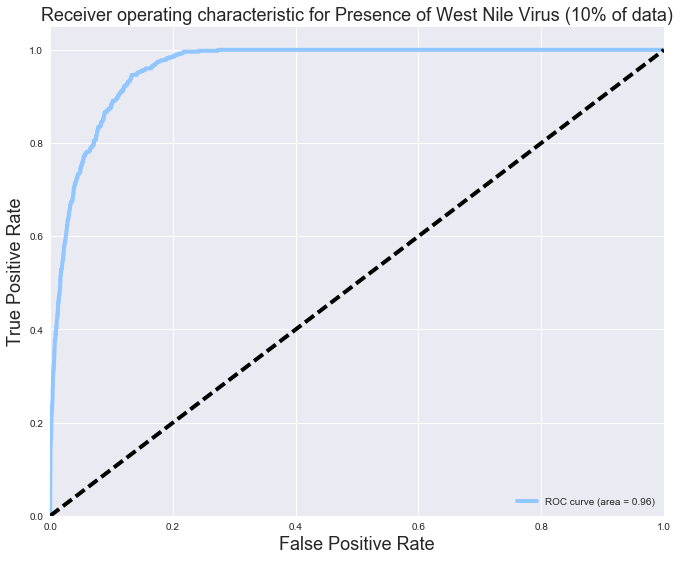

In [216]:
FPR[1], TPR[1], _ = roc_curve(y, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (WNV Present)
fig3 = plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Presence of West Nile Virus (10% of data)', fontsize=18)
plt.legend(loc="lower right")
plt.show()


In [217]:
fig3.savefig("../Images/fig3.png")

In [106]:
X2.to_csv("../assets/bestmodelXtrain_mg.csv", index = False, encoding = "utf-8")

In [107]:
targetX.to_csv("../assets/bestmodelXtest_mg.csv", index = False, encoding = "utf-8")

In [108]:
modtrain = pd.concat([X2, train.NumMosquitos, y], axis = 1)

In [109]:
modtrain.to_csv("../assets/trainforviz_mg.csv", index = False, encoding = "utf-8")

In [110]:
modtest = pd.concat([targetX, targety], axis = 1)

In [111]:
modtest.drop("Id", axis = 1, inplace = True)

In [112]:
modtest.to_csv("../assets/testforviz_mg.csv", index = False, encoding = "utf-8")

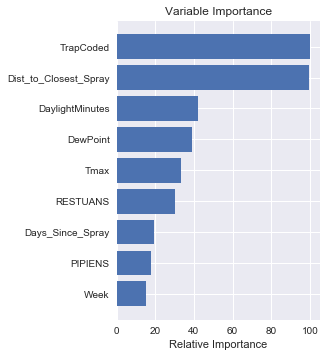

In [113]:
feature_importance = geebee.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

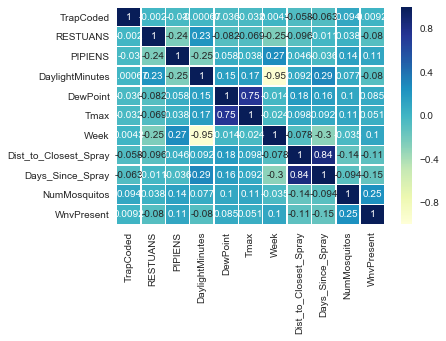

In [328]:
sns.heatmap(modtrain.corr(), linewidths = 0.4, annot = True, cmap = "YlGnBu")

In [115]:
modmodtrain = modtrain.drop("NumMosquitos", axis = 1)

In [329]:
plt.rcParams['figure.figsize'] = (14, 12) ## I want my figures to be bigger
plt.rcParams['font.size'] = 17 ##and legible

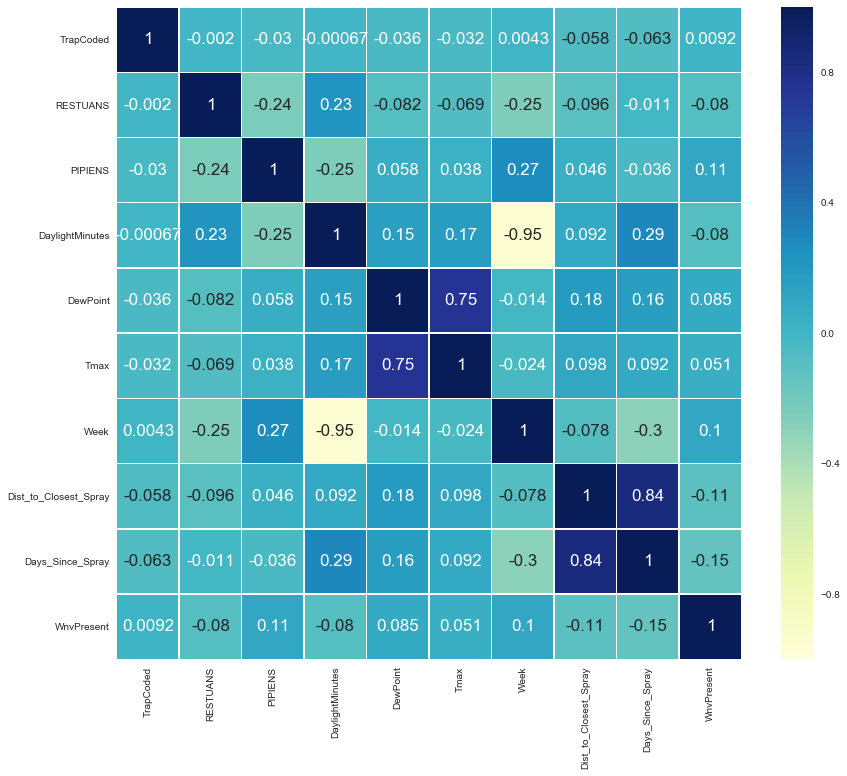

In [334]:
heatmap = sns.heatmap(modmodtrain.corr(), linewidths = 0.4, annot = True, cmap = "YlGnBu")

In [339]:
fig4 = heatmap.get_figure()
fig4.savefig("../Images/fig4.png")

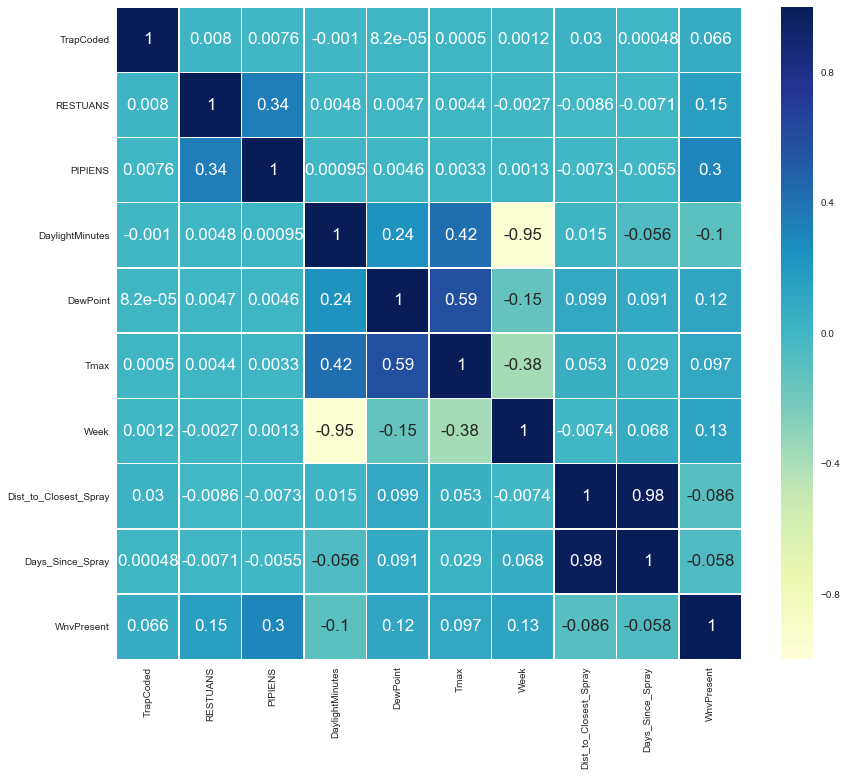

In [337]:
heatmap2 = sns.heatmap(modtest.corr(), linewidths = 0.4, annot = True, cmap = "YlGnBu")

In [340]:
fig5 = heatmap2.get_figure()
fig5.savefig("../Images/fig5.png")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

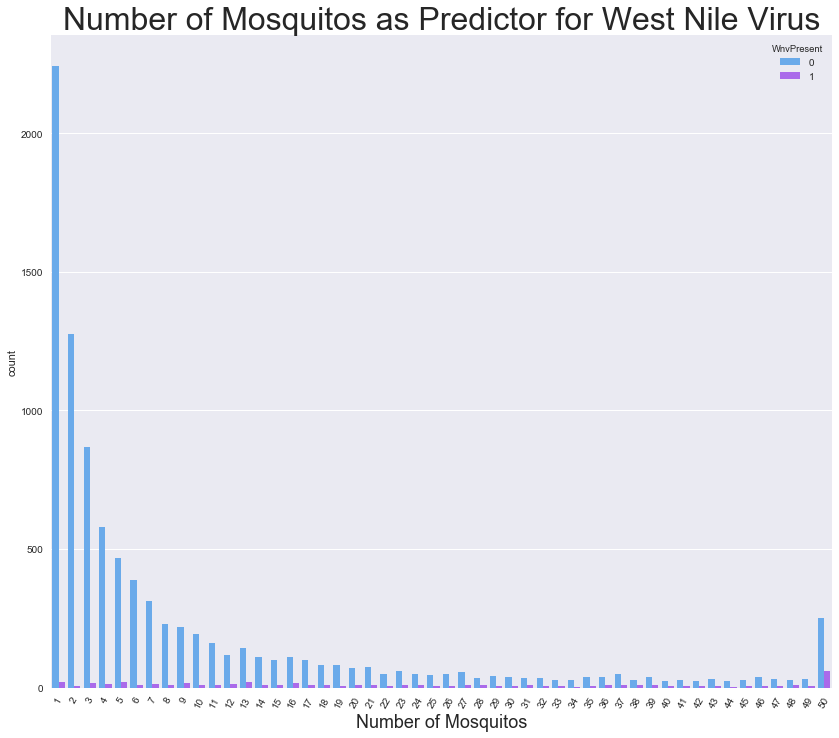

In [119]:
sns.countplot(x = "NumMosquitos", hue = "WnvPresent", data = modtrain, palette = "cool")
plt.xlabel("Number of Mosquitos", fontsize = 18)
plt.title("Number of Mosquitos as Predictor for West Nile Virus", fontsize = 32)
plt.xticks(rotation = 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

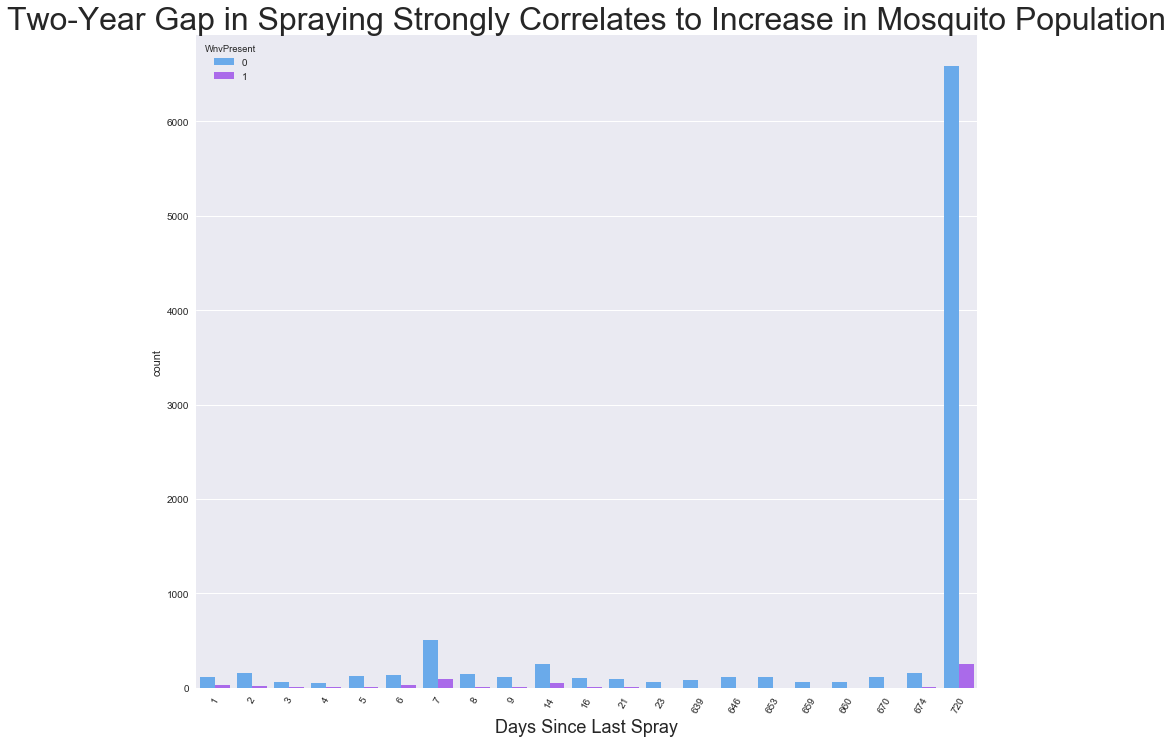

In [120]:
sns.countplot(x = "Days_Since_Spray", hue = "WnvPresent", data = modmodtrain, palette = "cool")
plt.xlabel("Days Since Last Spray", fontsize = 18)
plt.title("Two-Year Gap in Spraying Strongly Correlates to Increase in Mosquito Population", fontsize = 32)
plt.xticks(rotation = 60)

In [121]:
plt.rcParams['figure.figsize'] = (14, 12)

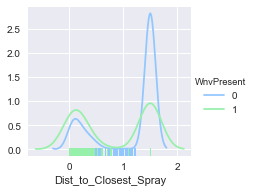

In [122]:
plt.style.use("seaborn-pastel")
fig = sns.FacetGrid(modmodtrain, hue = "WnvPresent")
fig.map(sns.distplot, "Dist_to_Closest_Spray", hist = False, rug = True)
fig.add_legend()

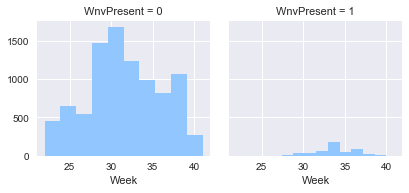

In [341]:
fig = sns.FacetGrid(modmodtrain, col = "WnvPresent")
fig.map(plt.hist, "Week")

In [342]:
fig.savefig("../Images/fig6.png")

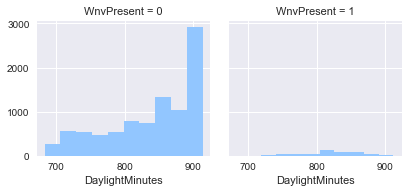

In [343]:
fig = sns.FacetGrid(modmodtrain, col = "WnvPresent")
fig.map(plt.hist, "DaylightMinutes")

In [344]:
fig.savefig("../Images/fig7.png")

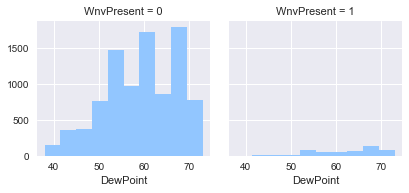

In [345]:
fig = sns.FacetGrid(modmodtrain, col = "WnvPresent")
fig.map(plt.hist, "DewPoint")

In [346]:
fig.savefig("../Images/fig8.png")

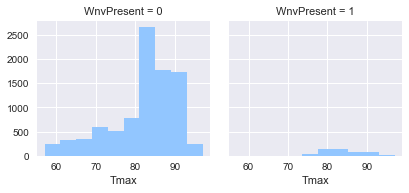

In [347]:
fig = sns.FacetGrid(modmodtrain, col = "WnvPresent")
fig.map(plt.hist, "Tmax")

In [348]:
fig.savefig("../Images/fig8.png")

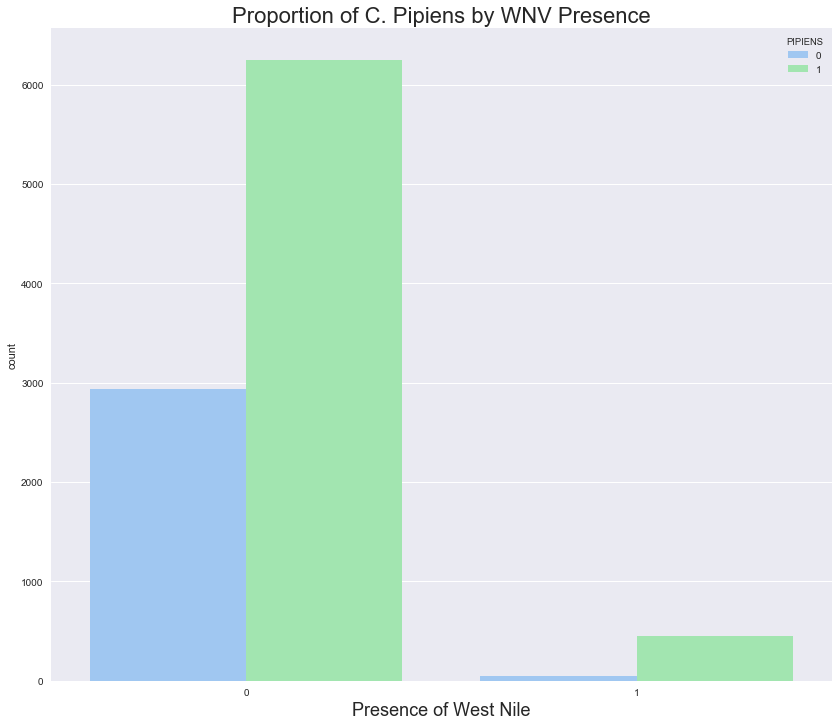

In [349]:
pipfig = sns.countplot(x="WnvPresent", hue = "PIPIENS", data = modmodtrain)
plt.xlabel("Presence of West Nile", fontsize = 18)
plt.title("Proportion of C. Pipiens by WNV Presence", fontsize = 22)

In [350]:
fig9 = pipfig.get_figure()
fig9.savefig("../Images/fig9.png") 

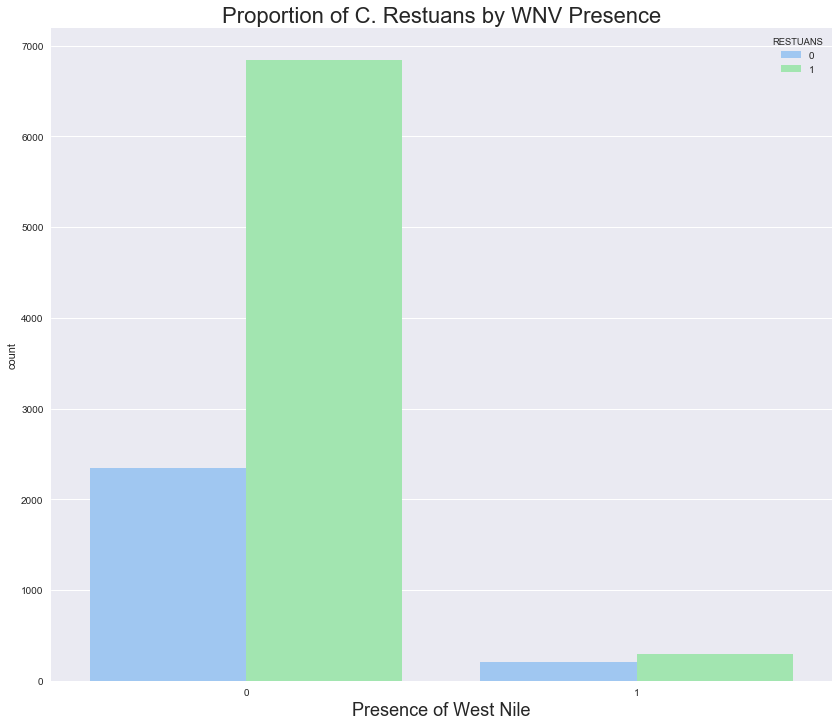

In [351]:
resfig = sns.countplot(x="WnvPresent", hue = "RESTUANS", data = modmodtrain)
plt.xlabel("Presence of West Nile", fontsize = 18)
plt.title("Proportion of C. Restuans by WNV Presence", fontsize = 22)

In [352]:
fig10 = resfig.get_figure()
fig10.savefig("../Images/fig10.png") 